In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import os
import json
import gzip
from urllib.request import urlopen
from keras.models import load_model

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model

In [ ]:
!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Cell_Phones_and_Accessories_5.json.gz
!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Arts_Crafts_and_Sewing_5.json.gz
!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Clothing_Shoes_and_Jewelry_5.json.gz
!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Books_5.json.gz
!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Electronics_5.json.gz
!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Home_and_Kitchen_5.json.gz
!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Kindle_Store_5.json.gz
!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Sports_and_Outdoors_5.json.gz
!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Toys_and_Games_5.json.gz

--2022-07-03 07:55:14--  http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Cell_Phones_and_Accessories_5.json.gz
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169071325 (161M) [application/octet-stream]
Saving to: ‘Cell_Phones_and_Accessories_5.json.gz’

Cell_Phones_and_Acc 100%[===================>] 161.24M  41.7MB/s    in 4.3s    

2022-07-03 07:55:18 (37.5 MB/s) - ‘Cell_Phones_and_Accessories_5.json.gz’ saved [169071325/169071325]

--2022-07-03 07:55:18--  http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Arts_Crafts_and_Sewing_5.json.gz
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53965563 (51M) [application/octet-stream]
Saving to: ‘Arts_Crafts_and_Sewin

In [ ]:
datasets = {
    1 : 'Cell_Phones_and_Accessories',
    2 : 'Arts_Crafts_and_Sewing',
    3 : 'Clothing_Shoes_and_Jewelry',
    4 : 'Books',
    5 : 'Electronics',
    6 : 'Kindle_Store',
    7 : 'Sports_and_Outdoors',
    8 : 'Toys_and_Games'
}

In [ ]:
def extract_zip(data_name):
  
  data = []
  path = '/content/'+ data_name + '_5.json.gz'
  count = 0
  with gzip.open(path) as f:
    for l in f:
      if count < 100000:
        data.append(json.loads(l.strip()))
      count += 1
      
 
  print(f'{count}', ' : ', data_name)

  return data

In [ ]:
data = {}
for dataset in datasets.values():
  data[dataset] = extract_zip(dataset)

1128437  :  Cell_Phones_and_Accessories
494485  :  Arts_Crafts_and_Sewing
11285464  :  Clothing_Shoes_and_Jewelry
27164983  :  Books
6739590  :  Electronics
2222983  :  Kindle_Store
2839940  :  Sports_and_Outdoors
1828971  :  Toys_and_Games


In [ ]:

df = pd.DataFrame.from_dict(data['Cell_Phones_and_Accessories'])

df.head()


,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"08 4, 2014",A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN
1,5.0,True,"02 12, 2014",A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN
2,3.0,True,"02 8, 2014",AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,NaN,NaN
3,2.0,True,"02 4, 2014",A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,NaN,NaN
4,4.0,True,"02 3, 2014",A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,NaN,NaN


In [ ]:
df = df[['overall', 'reviewText']]
df.head()

,overall,reviewText
0,5.0,Looks even better in person. Be careful to not...
1,5.0,When you don't want to spend a whole lot of ca...
2,3.0,"so the case came on time, i love the design. I..."
3,2.0,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...
4,4.0,"I liked it because it was cute, but the studs ..."


In [ ]:
for i,d in df.iloc[0:10].iterrows():
  print(d[0],' - ', d[1])

5.0  -  Looks even better in person. Be careful to not drop your phone so often because the rhinestones will fall off (duh). More of a decorative case than it is protective, but I will say that it fits perfectly and securely on my phone. Overall, very pleased with this purchase.
5.0  -  When you don't want to spend a whole lot of cash but want a great deal...this is the shop to buy from!
3.0  -  so the case came on time, i love the design. I'm actually missing 2 studs but nothing too noticeable the studding is almost a bit sloppy around the bow, but once again not too noticeable. I haven't put in my phone yet so this is just what I've notice so far
2.0  -  DON'T CARE FOR IT.  GAVE IT AS A GIFT AND THEY WERE OKAY WITH IT.  JUST NOT WHAT I EXPECTED.
4.0  -  I liked it because it was cute, but the studs fall off easily and to protect a phone this would not be recommended. Buy if you just like it for looks.
2.0  -  The product looked exactly like the picture and it was very nice. However o

In [ ]:
df = df[df['reviewText'].notna()]


df = df.astype({'overall': 'int32'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99965 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   overall     99965 non-null  int32 
 1   reviewText  99965 non-null  object
dtypes: int32(1), object(1)
memory usage: 1.9+ MB


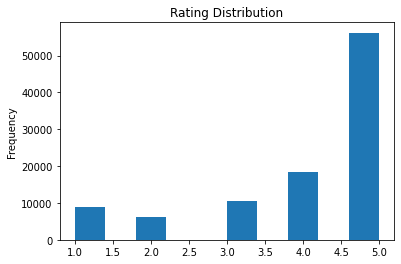

In [ ]:
df['overall'].plot(kind='hist', title='Rating Distribution')

In [ ]:

rus  = RandomUnderSampler(random_state=42)
df_final, _ = rus.fit_resample(df, df['overall'])
df_final = pd.DataFrame(df_final, columns=['overall','reviewText'])
df_final.shape

(30380, 2)

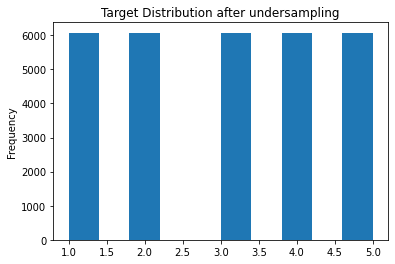

In [ ]:
df_final['overall'].plot(kind='hist', title='Target Distribution after undersampling');

In [ ]:
def process_data(data_array, data_name):

  print('######[ Processing', data_name, 'Data ]######')

  df = pd.DataFrame.from_dict(data_array)
  df = df[['overall', 'reviewText']]

  print("Unique Rating : ", df['overall'].unique())

  df = df[df['reviewText'].notna()]

  
  df = df.astype({'overall': 'int32'})

  df['overall'].plot(kind='hist', title='Rating Distribution of {}'.format(data_name))
  plt.show()


  rus  = RandomUnderSampler(random_state=42)
  df, _ = rus.fit_resample(df, df['overall'])
  df = pd.DataFrame(df, columns=['overall','reviewText'])
  print('Final size of data :', len(df), '\n')

 
  df = df.astype({'overall': 'int32'})

  df['overall'].plot(kind='hist', title='Target Distribution after undersampling of {}'.format(data_name));
  plt.show()

  return df

######[ Processing Cell_Phones_and_Accessories Data ]######
Unique Rating :  [5. 3. 2. 4. 1.]


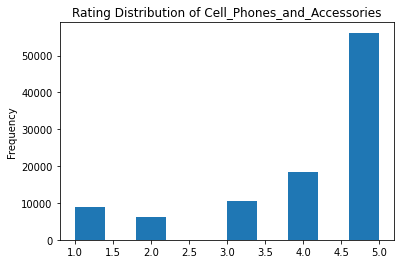

Final size of data : 30380 



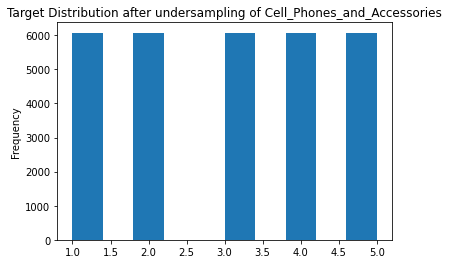

######[ Processing Arts_Crafts_and_Sewing Data ]######
Unique Rating :  [4. 5. 2. 3. 1.]


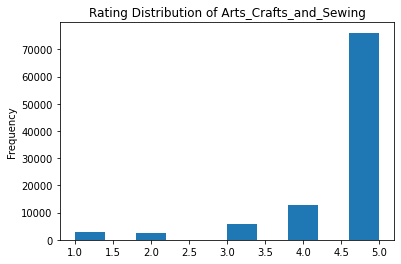

Final size of data : 12955 



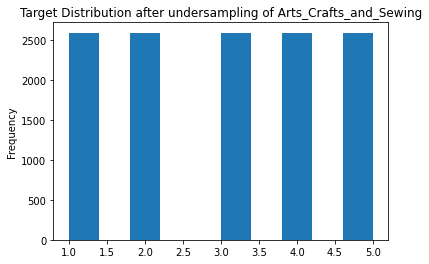

######[ Processing Clothing_Shoes_and_Jewelry Data ]######
Unique Rating :  [5. 4. 2. 3. 1.]


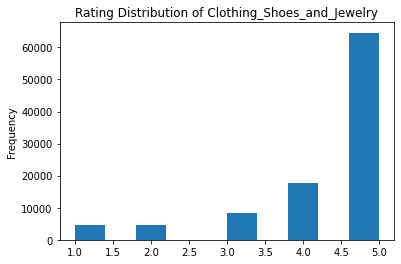

Final size of data : 22750 



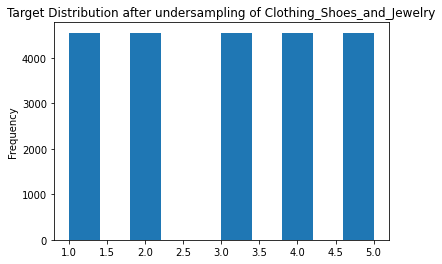

######[ Processing Books Data ]######
Unique Rating :  [5. 3. 2. 4. 1.]


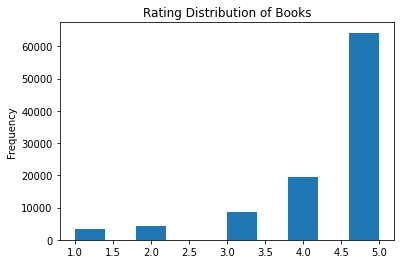

Final size of data : 17420 



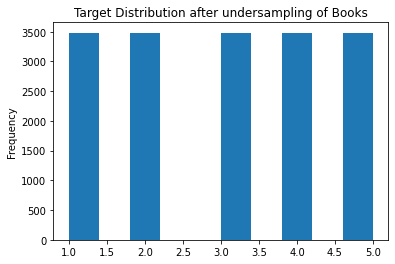

######[ Processing Electronics Data ]######
Unique Rating :  [5. 3. 4. 2. 1.]


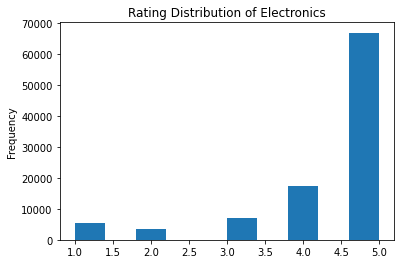

Final size of data : 17525 



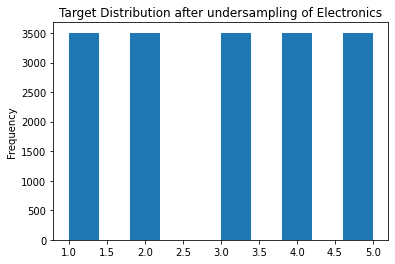

######[ Processing Kindle_Store Data ]######
Unique Rating :  [4. 5. 3. 2. 1.]


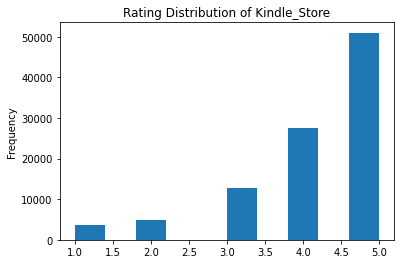

Final size of data : 18655 



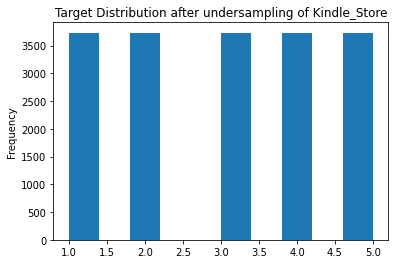

######[ Processing Sports_and_Outdoors Data ]######
Unique Rating :  [5. 1. 4. 3. 2.]


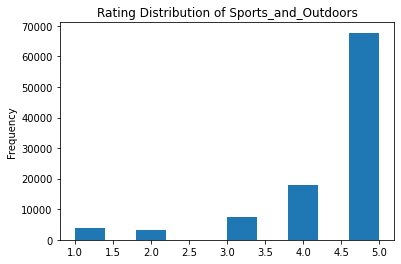

Final size of data : 16610 



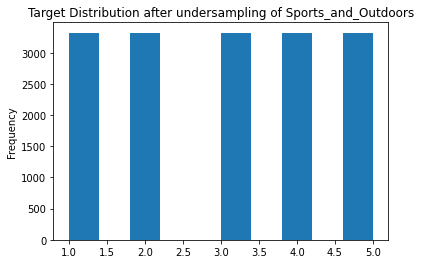

######[ Processing Toys_and_Games Data ]######
Unique Rating :  [5. 4. 2. 1. 3.]


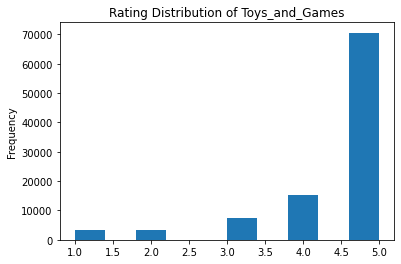

Final size of data : 16630 



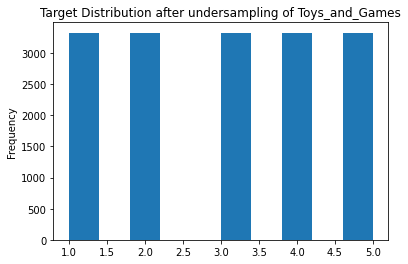

In [ ]:
processed_data = {}
for data_name, data_array in data.items():
  processed_data[data_name] = process_data(data_array, data_name)

In [ ]:

final_data = pd.concat(processed_data.values())
final_data.shape


(152925, 2)

In [ ]:

y = final_data.iloc[:, 0].values > 2
y = np.array([int(i) for i in y])

In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split(final_data['reviewText'], y, random_state=42, train_size=0.9, stratify=y)

print('No. of samples Training data :', X_train.shape[0])
print('No. of samples Validation data :', X_test.shape[0])

No. of samples Training data : 137632
No. of samples Validation data : 15293


In [ ]:
vocab_size = 5000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(X_train)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

In [ ]:

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(X_train[1])

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? save your money and invest in an otterbox this is a poor <OOV> at a great product the plastic is cheap and the rubber doesn't fit properly
1    Characters you don't care about, exposition in...
1    This is a rugged case, but you will not be abl...
1                        pile of garbage, don't buy it
1    but definitly NOT...  tiny book..  make robot ...
1    From buying this totally waste of technology. ...
1    I am so frustrated with Anita Shreve.  I canno...
1    The only thing nice I can say is it is made of...
1                                           Toxic??!!!
Name: reviewText, dtype: object


In [ ]:
padded.shape

(137632, 120)

In [ ]:


inputs = tf.keras.Input(shape=(max_length))
x = tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length)(inputs)
x = tf.keras.layers.Conv1D(120, 5, activation='relu')(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
outputs =  tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.models.Model(inputs, outputs)

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
plot_model(model, to_file="model_plot.png", show_shapes=True)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120)]             0         
                                                                 
 embedding (Embedding)       (None, 120, 16)           80000     
                                                                 
 conv1d (Conv1D)             (None, 116, 120)          9720      
                                                                 
 global_average_pooling1d (G  (None, 120)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 32)                3872      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                             

In [ ]:
num_epochs = 20
history = model.fit(padded, Y_train, epochs=num_epochs, validation_data=(testing_padded, Y_test))

Epoch 1/20
4301/4301 [==============================] - 52s 12ms/step - loss: 0.5735 - accuracy: 0.6963 - val_loss: 0.4868 - val_accuracy: 0.7663
Epoch 2/20
4301/4301 [==============================] - 50s 12ms/step - loss: 0.4613 - accuracy: 0.7853 - val_loss: 0.4531 - val_accuracy: 0.7872
Epoch 3/20
4301/4301 [==============================] - 50s 12ms/step - loss: 0.4339 - accuracy: 0.7992 - val_loss: 0.4399 - val_accuracy: 0.7958
Epoch 4/20
4301/4301 [==============================] - 52s 12ms/step - loss: 0.4215 - accuracy: 0.8057 - val_loss: 0.4339 - val_accuracy: 0.7958
Epoch 5/20
4301/4301 [==============================] - 51s 12ms/step - loss: 0.4137 - accuracy: 0.8102 - val_loss: 0.4303 - val_accuracy: 0.8008
Epoch 6/20
4301/4301 [==============================] - 51s 12ms/step - loss: 0.4082 - accuracy: 0.8138 - val_loss: 0.4266 - val_accuracy: 0.8010
Epoch 7/20
4301/4301 [==============================] - 50s 12ms/step - loss: 0.4038 - accuracy: 0.8163 - val_loss: 0.4240 -

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Amazon Review/model_new_1.h5')

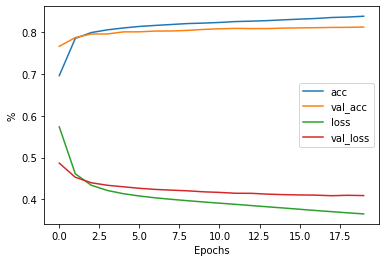

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel('%')
plt.legend(['acc', 'val_acc', 'loss', 'val_loss'])
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(testing_padded)
y_pred = y_pred > .5


print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      6117
           1       0.85      0.84      0.84      9176

    accuracy                           0.81     15293
   macro avg       0.80      0.81      0.81     15293
weighted avg       0.81      0.81      0.81     15293



In [ ]:
save_model = load_model('/content/drive/MyDrive/Colab Notebooks/Amazon Review/model_new_1.h5')


save_model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
your_review = "this is the good product"

In [ ]:
your_padded_review = pad_sequences(tokenizer.texts_to_sequences([your_review]), maxlen=max_length, truncating=trunc_type)
prediction = save_model.predict(your_padded_review)[0][0]

if prediction > 0.5:
  print('good')
else:
  print('not good')

prediction

good


0.9336965